In [1]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '..')
from imageProcessing import *

In [2]:
focalLength = 50.0*1920/36.0
cameraXYZ = -1 * np.matrix([5, 5, -2.5])
cameraXYZ[0, 1] = -1 * cameraXYZ[0, 1]
cameraEuler = [np.pi/4, 1.22173, 0] # Camera orientation as Euler angles (in radians)

depthImage = "../Depth.exr"
depthImageArray = cv2.imread(depthImage, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
colorImage = "../Color.png"
colorImageArray = cv2.imread(colorImage)

# Call the function with an example depth image file
points = depthToWorld(focalLength, cameraXYZ, cameraEuler, depthImageArray, colorImageArray)

In [3]:
focalLength = 50.0*1920/36.0
cameraXYZ = -1 * np.matrix([-4, 6, 4])
cameraXYZ[0, 1] = -1 * cameraXYZ[0, 1]
cameraEuler = [np.pi/4, -2.44346, 0] # Camera orientation as Euler angles (in radians)

depthImage = "../DepthRear.exr"
depthImageArray = cv2.imread(depthImage, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
colorImage = "../Color2.png"
colorImageArray = cv2.imread(colorImage)

# Call the function with an example depth image file
points2 = depthToWorld(focalLength, cameraXYZ, cameraEuler, depthImageArray, colorImageArray)

In [4]:
xSize = 600
ySize = 600
scale = 80
mapPoints = np.zeros((xSize, ySize, 3))
flatten(xSize, ySize, scale, points2, mapPoints)
flatten(xSize, ySize, scale, points, mapPoints)
cv2.imwrite('testMap.jpg', mapPoints)

True

In [5]:
# Get chunk of image for ML Model
posMat = np.matrix([300, 300, 0])
position = [posMat[0, 0], posMat[0, 1]]
chunkX = 200
chunkY = 200
chunkXOffset = 100
chunkYOffset = 100
model = YOLO('yolov8x-seg.pt')
decreaseByProbability = True
confRequirement = 0.01
imageChunk = getImageChunk(mapPoints, chunkX, chunkY, chunkXOffset, chunkYOffset, position)

# Get costmap of chunk
costChunk = detectObjects(imageChunk, model, decreaseByProbability, confRequirement)

# Update the costmap
costMap = np.ones((xSize, ySize))
updateCostMap(costMap, costChunk, chunkXOffset, chunkYOffset, position)
cv2.imwrite('1.jpg', mapPoints[:, :, 0:3])
cv2.imwrite('2.jpg', costMap * 255)
cv2.imwrite('3.jpg', imageChunk)
cv2.imwrite('4.jpg', costChunk*255)


0: 640x640 1 person, 1 airplane, 3 umbrellas, 1 dining table, 1600.7ms
Speed: 19.9ms preprocess, 1600.7ms inference, 14.0ms postprocess per image at shape (1, 3, 640, 640)


True

In [7]:
main()


0: 448x640 1 person, 1 traffic light, 2 stop signs, 10 umbrellas, 1 handbag, 3 frisbees, 1 kite, 1 mouse, 1 clock, 936.5ms
Speed: 13.0ms preprocess, 936.5ms inference, 17.0ms postprocess per image at shape (1, 3, 448, 640)
loop finished

0: 448x640 1 person, 1 traffic light, 2 stop signs, 10 umbrellas, 1 handbag, 3 frisbees, 1 kite, 1 mouse, 1 clock, 889.6ms
Speed: 14.0ms preprocess, 889.6ms inference, 15.0ms postprocess per image at shape (1, 3, 448, 640)
loop finished

0: 448x640 1 person, 1 traffic light, 2 stop signs, 10 umbrellas, 1 handbag, 3 frisbees, 1 kite, 1 mouse, 1 clock, 925.5ms
Speed: 14.0ms preprocess, 925.5ms inference, 15.0ms postprocess per image at shape (1, 3, 448, 640)
loop finished

0: 448x640 1 person, 1 traffic light, 2 stop signs, 10 umbrellas, 1 handbag, 3 frisbees, 1 kite, 1 mouse, 1 clock, 877.7ms
Speed: 13.9ms preprocess, 877.7ms inference, 18.9ms postprocess per image at shape (1, 3, 448, 640)
loop finished

0: 448x640 1 person, 1 traffic light, 2 stop si

KeyboardInterrupt: 

In [5]:
def plot(points):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(points[:,0], points[:,2], points[:,1], c = (np.matrix([points[:, 5], points[:, 4], points[:, 3]]).transpose() / 255))
    ax.set_aspect('equal')
    ax.set_xlabel("X")
    ax.set_ylabel("Z")
    ax.set_zlabel("Y")
    plt.title("3D Point Cloud from Depth Image")
    plt.show()

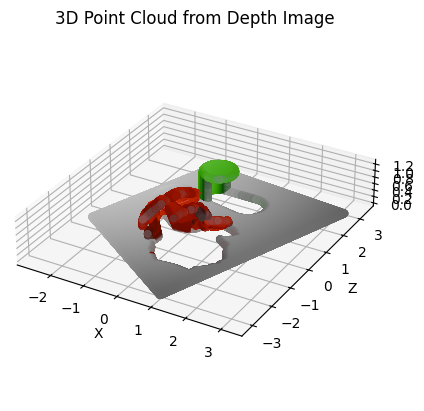

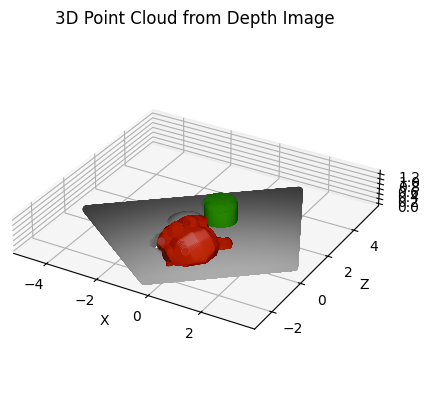

In [5]:
plot(points)
plot(points2)